Juan Miguel Armenta Cano

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
#Cargamos el DataSet con los datos de las zarigüeyas 
data = pd.read_csv('possum.csv')
#Observamos los encabezados del DataFrame
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
data = data.dropna()
#Verificamos nuevamente la información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    int64  
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 11.8+ KB


In [4]:
#Agrupamos el conjunto de entrenamiento y variable de clase
X_train = data[['case', 'site', 'sex','age','hdlngth','skullw','totlngth','taill', 'footlgth' , 'earconch' , 'eye' , 'chest' , 'belly']]
y_train = data[['sex']]

In [5]:
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score)
import warnings
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
warnings.simplefilter("ignore")

Primero objetivo

se usaran 10 clasificadores los cuales son:
1. Arboles de desicion 
2. Aprendizaje bayesioano
3. Máquina de soporte vectorial
4. SVC
5. GaussianNB
6. RandomForest
7. AdaBoost
8. RBF
9. GaussianProcess
10. QDA

en todos estos clasificadores se usara validacion cruzada con K=10 usando cross_val_score


In [6]:
clfd1 = DecisionTreeClassifier(max_depth=5, random_state=42)
prediccion = cross_val_predict(clfd1, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[42  0]
 [ 0 59]]
Test accuracy =  1.0
sensibilidad= 1.0
especificidad= 1.0


In [7]:
clfd2 = GaussianNB()
prediccion = cross_val_predict(clfd2, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[42  0]
 [ 0 59]]
Test accuracy =  1.0
sensibilidad= 1.0
especificidad= 1.0


In [8]:
clfd3 = KNeighborsClassifier(5)
prediccion = cross_val_predict(clfd3, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[11 31]
 [36 23]]
Test accuracy =  0.33663366336633666
sensibilidad= 0.23404255319148937
especificidad= 0.42592592592592593


In [9]:
clfd4 = SVC (kernel="linear", C=0.025, random_state=42)
prediccion = cross_val_predict(clfd3, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[11 31]
 [36 23]]
Test accuracy =  0.33663366336633666
sensibilidad= 0.23404255319148937
especificidad= 0.42592592592592593


In [10]:
clfd5 = GaussianProcessClassifier (1.0 * RBF(1.0), random_state=42)
prediccion = cross_val_predict(clfd5, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[28 14]
 [22 37]]
Test accuracy =  0.6435643564356436
sensibilidad= 0.56
especificidad= 0.7254901960784313


In [11]:
clfd6 =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)
prediccion = cross_val_predict(clfd6, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[31 11]
 [ 3 56]]
Test accuracy =  0.8613861386138614
sensibilidad= 0.9117647058823529
especificidad= 0.835820895522388


In [12]:
clfd7 =  AdaBoostClassifier(random_state=42)
prediccion = cross_val_predict(clfd7, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[42  0]
 [ 0 59]]
Test accuracy =  1.0
sensibilidad= 1.0
especificidad= 1.0


In [13]:
clfd8 =  SVC(gamma=2, C=1, random_state=42)
prediccion = cross_val_predict(clfd8, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[ 0 42]
 [ 0 59]]
Test accuracy =  0.5841584158415841
sensibilidad= nan
especificidad= 0.5841584158415841


In [14]:
clfd9 =  GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42)
prediccion = cross_val_predict(clfd9, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[28 14]
 [22 37]]
Test accuracy =  0.6435643564356436
sensibilidad= 0.56
especificidad= 0.7254901960784313


In [15]:
clfd10 =  QuadraticDiscriminantAnalysis()
prediccion = cross_val_predict(clfd10, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[42  0]
 [ 0 59]]
Test accuracy =  1.0
sensibilidad= 1.0
especificidad= 1.0


segundo Objetivo

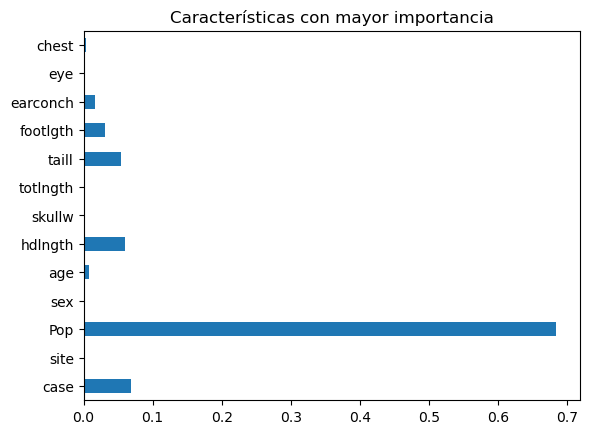

In [16]:
X_nueva = mutual_info_classif(X_train, y_train)
feat_imp = pd.Series(X_nueva, data.columns[0:len(data.columns)-1])
feat_imp.plot(title="Características con mayor importancia", kind='barh')
plt.show()

In [17]:
X_train = data[['case','hdlngth', 'taill' , 'chest', 'totlngth', 'age' ]]
clfd =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)
X_PCA = PCA(n_components=2).fit_transform(X_train)
prediccion = cross_val_predict(clfd, X_PCA, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[11 31]
 [33 26]]
Test accuracy =  0.36633663366336633
sensibilidad= 0.25
especificidad= 0.45614035087719296


In [18]:
X_train = data[['case','hdlngth', 'taill' , 'chest' ]]
clfd =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)
X_PCA = PCA(n_components=2).fit_transform(X_train)
prediccion = cross_val_predict(clfd, X_PCA, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[14 28]
 [34 25]]
Test accuracy =  0.38613861386138615
sensibilidad= 0.2916666666666667
especificidad= 0.4716981132075472


In [19]:
X_train = data[['case','hdlngth']]
clfd =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)
X_PCA = PCA(n_components=2).fit_transform(X_train)
prediccion = cross_val_predict(clfd, X_PCA, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[16 26]
 [33 26]]
Test accuracy =  0.4158415841584158
sensibilidad= 0.32653061224489793
especificidad= 0.5


Conclusiones:


Primero Objetivo.- notamos que cuando probamos los 10 clasificadores 4 de los 10 nos diero el resultado sobre "accuracy, sensibilidad, especificidad" con valores de 1
los cuales son:
1. DecisionTreeClassifier
2. GaussianNB
3. AdaBoostClassifier
4. QuadraticDiscriminantAnalysis

De esto podemos observar que al 5 clasificador fue RandomForestClassifier con valores:
1. Test accuracy =  0.86
2. sensibilidad= 0.91
3. especificidad= 0.83

Con RandomForest se probo el segundo objetivo en el cual se observo que aplicar reduccion de dimensionalidad con PCA nos afecta los resultados drasticamente por lo que en este caso no es factible hacer procesamiento de datos y es mejor trabajar con los datos originales.


